<a href="https://colab.research.google.com/github/virajyadav/google_colab_experiments/blob/main/Object_Detection_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection Tutorial**

---

This notebook is associated with the blog "Object Detection using Tensorflow 2: Building a Face Mask Detector on Google Colab". It contains the code used in the tutorial. You're free to re-use, modify or share this notebook.

# Installing required packages for Tensorflow Object Detection

We install the pre-required packages for Object Detection

In [1]:
# Ensure to use the GPU runtime

!nvidia-smi

Fri Jan  7 12:34:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


## 1. Clone Tensorflow-Object-Detection repository

Repository link: https://github.com/deepme987/Tensorflow-Object-Detection

In [2]:
# Clone our github repository to access utility files for data preparation
# Respository: https://github.com/deepme987/Tensorflow-Object-Detection

!git clone https://github.com/deepme987/Tensorflow-Object-Detection
%cd Tensorflow-Object-Detection

Cloning into 'Tensorflow-Object-Detection'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 27), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (59/59), done.
/content/Tensorflow-Object-Detection


## 2. Cloning the Tensorflow library and building the package.

Installation Guide followed from [Tensorflow](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.mdhttps://)

In [3]:
# Upgrade pip to latest version
!pip install pip --upgrade

# Download Object Detection API and build necessary files

%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/models/research/
# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
%cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

!python object_detection/builders/model_builder_tf2_test.py
%cd /content/Tensorflow-Object-Detection

     |████████████████████████████████| 1.7 MB 11.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
/content
/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 9.9 MB 19.2 MB/s            
     |████████████████████████████████| 352 kB 53.0 MB/s            
     |████████████████████████████████| 1.8 MB 47.1 MB/s            
     |████████████████████████████████| 23.1 MB 1.5 MB/s             
     |████████████████████████████████| 213 kB 53.2 MB/s            
     |████████████████████████████████| 47.7 MB 72 kB/s              
     |████████████████████████████████| 1.1 MB 38.5 MB/s            
     |████████████████████████████████| 4.9 MB 39.9 MB/s            
     |████████████████████████████████| 90 kB 10.1 MB/s            
     |███████████████████

# Downloading the data

You can download the data on your local machine and upload it on colab. For larger datasets, provided by Kaggle, you can download them directly to colab.

## 1. To upload from local machine:

In [ ]:
''' Download Dataset on your local machine and upload to /content/Tensorflow-Object-Detection'''
# Upload the dataset to colab

from google.colab import files
files.upload()

# Unzipping the content
!unzip archive.zip
!rm archive.zip

## 2. To download directly from Kaggle

You need to first download your Kaggle API key. You can find it by logging in to Kaggle under "My Account" tab.

It will download a file named kaggle.json which can be uploaded here.

In [4]:
''' Download Dataset through Kaggle API'''

from google.colab import files
files.upload()

# upload kaggle.json: Your account's API Key downloaded from kaggle

# Install kaggle and change permissions for the uploaded json file 

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!rm kaggle.json

!kaggle datasets download -d andrewmvd/face-mask-detection 
!unzip face-mask-detection.zip
!rm face-mask-detection.zip

Saving kaggle.json to kaggle.json
 98% 390M/398M [00:02<00:00, 180MB/s]
100% 398M/398M [00:02<00:00, 168MB/s]
Archive:  face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: ann

In [13]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [14]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.2 MB/s             


# Data Preparations

## 1. Looking into the data

We open few random images from the downloaded dataset. 

images/maksssksksss147.png


images/maksssksksss129.png


images/maksssksksss101.png


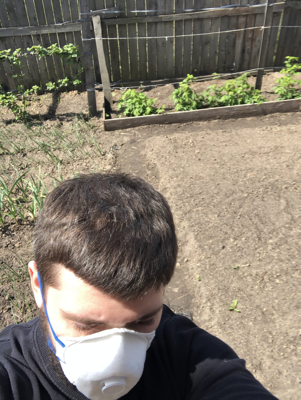

In [15]:
# Check few images in the dataset

import random
import cv2
import glob
from google.colab.patches import cv2_imshow

# Change the extension accordingly if your dataset is not png
TEST_IMAGE_PATHS = glob.glob('images/*.png')

# Change the value of k to the number of images to display
try:
    images = random.sample(TEST_IMAGE_PATHS, k=3)
except:
    # Exception incase the value of k is higher than available samples
    images = TEST_IMAGE_PATHS


for image_path in images:
    print(image_path)
    img = cv2.imread(image_path)
    cv2_imshow(img)


## 2. Converting the XML data into CSV file

TFRecords are generated using csv files. However, in case your data is annotated in XML format, you can use this script from the Tensorflow-Object-Detection repository we cloned earlier.

In [16]:
# The dataset contains all annotations in xml format. 
# However, we need csv files for Object Detection
# Change <PATH TO ANNOTATIONS> to point annotation directory and
# <OUTPUT FILE NAME> as required filename.csv for custom dataset

# !python xml_to_csv.py --xml_path=<PATH TO ANNOTATIONS> --csv_output=<OUTPUT FILE NAME>

!python xml_to_csv.py --xml_path=annotations/ --csv_output=annotations.csv

Reading xml from folder annotations/
Successfully converted xml to csv.


## 3. Reading the annotations and splitting into train and test

In [17]:
# Read all annotations from the generated csv

import pandas as pd
data = pd.read_csv("annotations.csv")
data

filename  width  height      class  xmin  ymin  xmax  ymax
0     maksssksksss390.png    400     300  with_mask    51   131    81   159
1     maksssksksss390.png    400     300  with_mask    96   130   126   158
2     maksssksksss390.png    400     300  with_mask   197   126   219   150
3     maksssksksss390.png    400     300  with_mask   281   137   305   157
4     maksssksksss390.png    400     300  with_mask   315   130   332   147
...                   ...    ...     ...        ...   ...   ...   ...   ...
4067  maksssksksss804.png    400     258  with_mask   132    43   140    52
4068  maksssksksss804.png    400     258  with_mask   152    45   160    53
4069  maksssksksss804.png    400     258  with_mask   386    49   393    56
4070  maksssksksss241.png    400     210  with_mask   172    74   246   147
4071  maksssksksss560.png    400     267  with_mask   179   126   219   165

[4072 rows x 8 columns]

In [18]:
# Split data into train-test
# Avoid using sklearn's train_test_split to split the data as it may use 
# same image in train as well as test for different annotation 

from sklearn.model_selection import GroupShuffleSplit

# You can change the test_size below (ideally between 0.2-0.4)
train_inds, test_inds = next(GroupShuffleSplit(test_size=0.30, random_state = 7).split(data, groups=data['filename']))

train = data.iloc[train_inds]
test = data.iloc[test_inds]


# Export the csv files, we'll use these for generating tfrecords
train.to_csv("train_labels.csv")
test.to_csv("test_labels.csv")

## 4. Generating labelmap.pbtxt

A labelmap.pbtxt file consists of class ID mapped to their class names. Since Tensorflow models deal with only numeric values, we need to convert the string class names into numbers, starting with 1.

In [19]:
# Generate labelmap.pbtxt based on training labels.

ob = "{"
cb = "}"
nl = "\n"

string = ""
for i, class_ in enumerate(set(train["class"])):
    string += f"""
item {ob} 
  id: {i+1}
  name: '{class_}'
{cb}"""

with open("labelmap.pbtxt", 'w') as file:
    file.write(string)


In [20]:
# Check the labelmap file

!cat labelmap.pbtxt


item { 
  id: 1
  name: 'without_mask'
}
item { 
  id: 2
  name: 'mask_weared_incorrect'
}
item { 
  id: 3
  name: 'with_mask'
}

## 5. Create TFRecords

We use the previously generated train and test data records with images and labelmap to build the TFRecords that will be used for training the model.

In [21]:
# Tensorflow uses tfrecord files for training
# To Generate tfrecord files based on input data (images and csv files).
# For huge datasets, this step may take long time 
# May take hours for dataset above 5GB

# Change the image path accordingly for your custom dataset
!python generate_tfrecord.py --csv_input train_labels.csv --output_path train.record --img_path="images/" --label_map labelmap.pbtxt
!python generate_tfrecord.py --csv_input test_labels.csv --output_path test.record --img_path="images/" --label_map labelmap.pbtxt

Successfully created the TFRecords: /content/Tensorflow-Object-Detection/train.record
Successfully created the TFRecords: /content/Tensorflow-Object-Detection/test.record


# Training the Model

## 1. Model Configurations



1.   Number of steps(num_steps): This specifies how many objects should the model train for.
2.   Model Name(selected_model): The name of the model available to download.
3.   Pipeline Name: The configuration file for the model available. 
4.   Batch Size: A batch size refers to how many instances of data will be considered at a time during training. 

You can find a detailed explanation of the model configurations in the tutorial blog.

In [22]:
# Model vars

# Number of training steps.
num_steps = 5000

# Number of evaluation steps.
num_eval_steps = 100
  

# A batch size determines how many inputs the model will consider at once
# for training. Generally a higher batch size increases convergence of the model,
# but requires higher graphic memory.
# The batch sizes in the given list are for Google Colab (Tesla K80)
# You may increase or decrease them if you're running them locally.

# We are still testing batch sizes for other models.
# This list will be updated for other available models after testing them!

MODELS_CONFIG = {
    'efficientdet_d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'batch_size': 8
    },
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'efficientdet_d0'

# Load variables related to selection model
MODEL = MODELS_CONFIG[selected_model]['model_name']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [23]:
# Initialize directory paths required 

DATASET_PATH = "/content/Tensorflow-Object-Detection/"

# We save all the COCO downloaded models under fine_tune_models
!mkdir {DATASET_PATH}"fine_tune_models"

DEST_DIR = DATASET_PATH + "fine_tune_models/" + MODEL

# This is the directory where we will store our trained checkpoints
model_dir = DATASET_PATH + MODEL

!mkdir {model_dir}

In [ ]:
# Your directory should look similar to this

!ls

annotations		       generate_tfrecord.py	    test_labels.csv
annotations.csv		       images			    test.record
ed_fix.py		       labelmap.pbtxt		    train_labels.csv
efficientdet_d0_coco17_tpu-32  Masked_Face_Detection.ipynb  train.record
fine_tune_models	       README.md		    xml_to_csv.py


Now that our data is prepared correctly, we can start with training our model.

In [24]:
import os

%cd /content/models/research

import shutil
import glob
import urllib.request
import tarfile

MODEL_FILE = MODEL + '.tar.gz'
# This is the base link for all the models pre-trained on COCO 2017
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'

# Download the weights for the pre-trained model
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# Delete the .zip file and move to fine_tune_models
os.remove(MODEL_FILE)
!mv {MODEL} {DEST_DIR}

/content/models/research


In [25]:
# Initializing other paths required for training

test_record_fname = DATASET_PATH + 'test.record'
train_record_fname = DATASET_PATH + 'train.record'
label_map_pbtxt_fname = DATASET_PATH + 'labelmap.pbtxt'
fine_tune_checkpoint = os.path.join(DEST_DIR, "checkpoint/ckpt-0")

In [26]:
# Tensorflow Object Detection API provides a list of sample configurations 
# that we can use by modifying the required paths and batch size

!cp "/content/models/research/object_detection/configs/tf2/"{pipeline_file} {model_dir}"/"{pipeline_file}
import os

pipeline_fname = os.path.join(model_dir, pipeline_file)

## 2. Building pipeline.config file based on Model Configurations

A pipeline.config file is used by a tensorflow model to find the required directories and configurations for the model.

In [27]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [28]:
# Change the configuration based on our model and data

import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train2017)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val2017)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    # Fine-tune checkpoint type
    s = re.sub('fine_tune_checkpoint_type: "classification"', 
               'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    s = re.sub('num_epochs: [0-9]+',
               'num_epochs: {}'.format(num_eval_steps), s)

    f.write(s)

In [29]:
# Confirm the changes made to the config
!cat {pipeline_fname}

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 3
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

## 3. Training 

Once we have all the files ready, we can train the model


In [30]:
# Finally, we can start training our model

!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

^C


In [32]:
# Check the files after training.
# A model creates checkpoints after some interval of time.

# Incase you stop training or run into any error, you can continue training 
# from the last available checkpoint. This can be used to divide long training
# sessions into smaller batches

!ls {model_dir}

checkpoint		    ckpt-3.index
ckpt-1.data-00000-of-00001  ckpt-4.data-00000-of-00001
ckpt-1.index		    ckpt-4.index
ckpt-2.data-00000-of-00001  ssd_efficientdet_d0_512x512_coco17_tpu-8.config
ckpt-2.index		    train
ckpt-3.data-00000-of-00001


## 4. Exporting the model


In [33]:
# Now that we trained our model, we can export the model's final checkpoint
# This will create a folder named "export" in the training directory which 
# contains the final checkpoint of the trained model

import re
import numpy as np

output_dir = model_dir + "/export"
!mkdir {output_dir}

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir={model_dir} \
    --output_directory={output_dir} \
    --pipeline_config_path={pipeline_fname}

2022-01-07 13:46:35.322068: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0107 13:46:35.331559 140594911106944 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b0
I0107 13:46:35.331786 140594911106944 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 64
I0107 13:46:35.331898 140594911106944 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet BiFPN num iterations: 3
I0107 13:46:35.336133 140594911106944 efficientnet_model.py:147] round_filter input=32 output=32
I0107 13:46:35.362037 140594911106944 efficientnet_model.py:147] round_filter input=32 output=32
I0107 13:46:35.362175 140594911106944 efficientnet_model.py:147] round_filter input=16 output=16
I0107 13:46:35.434126 140594911106944 efficientnet_model.py:147] round_filter input=16 output=16
I

In [34]:
# Check the exported files
!ls {model_dir}"/export"

checkpoint  pipeline.config  saved_model


# Inference

## 1. Test on same dataset

Using the exported checkpoint of the model to run Object Detection on our data.

In [35]:
# Utility library and functions for testing the model

import matplotlib
import matplotlib.pyplot as plt
import os
import glob

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
        path: the file path to the image

    Returns:
        uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    image = image.convert('RGB')
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
            (im_height, im_width, 3)).astype(np.uint8)


def get_model_detection_function(model):
    """Get a tf.function for detection."""

    @tf.function
    def detect_fn(image):
        """Detect objects in image."""

        image, shapes = model.preprocess(image)
        prediction_dict = model.predict(image, shapes)
        detections = model.postprocess(prediction_dict, shapes)

        return detections, prediction_dict, tf.reshape(shapes, [-1])

    return detect_fn

In [36]:
# Load the configurations, initialize paths and resotore the export checkpoint

MODEL_TEST = model_dir + "/export/"

pipeline_config = MODEL_TEST + 'pipeline.config'
model_dir_test = MODEL_TEST + 'checkpoint/ckpt-0'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
            model_config=model_config, is_training=False)

ckpt = tf.compat.v2.train.Checkpoint(
            model=detection_model)
ckpt.restore(os.path.join(model_dir_test))

In [37]:
# load labelmap, map them to it's labels and load the detector

detect_fn = get_model_detection_function(detection_model)

#map labels for inference decoding
label_map_path = label_map_pbtxt_fname
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
        label_map,
        max_num_classes=label_map_util.get_max_label_map_index(label_map),
        use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

/content/Tensorflow-Object-Detection/images/maksssksksss215.png


/content/Tensorflow-Object-Detection/images/maksssksksss665.png


/content/Tensorflow-Object-Detection/images/maksssksksss119.png


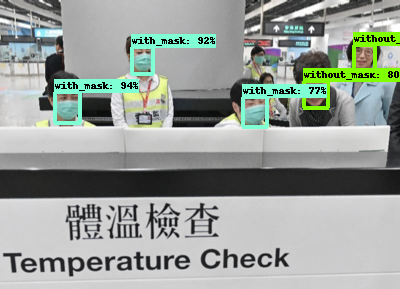

/content/Tensorflow-Object-Detection/images/maksssksksss345.png


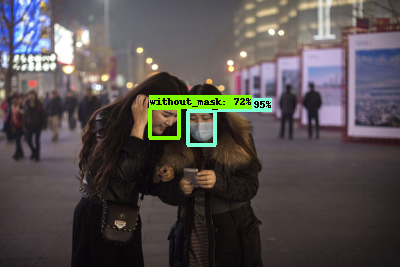

/content/Tensorflow-Object-Detection/images/maksssksksss181.png


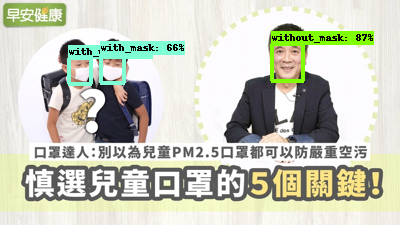

In [38]:
# Run the detector on image samples

import random
import cv2
import glob
from google.colab.patches import cv2_imshow

# Images from this path will be considered for testing
# Change the extension accordingly if your dataset is not png
TEST_IMAGE_PATHS = glob.glob(DATASET_PATH + 'images/*.png')

# Change the value of k to the number of images to be considered for testing
try:
    images = random.sample(TEST_IMAGE_PATHS, k=5)
except:
  # Exception incase the value of k is higher than available samples
    images = TEST_IMAGE_PATHS


for image_path in images:
    print(image_path)
    image_np = load_image_into_numpy_array(image_path)
        
    input_tensor = tf.convert_to_tensor(
            np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'][0].numpy(),
                (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
                detections['detection_scores'][0].numpy(),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.6,
                agnostic_mode=False,
    )

    cv2_imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))

## 2. Test on custom uploaded data

In [39]:
# If you would like to test the model on your data, 
# create a folder named custom data and manually upload your files here

!mkdir {DATASET_PATH}custom_data
%cd {DATASET_PATH}custom_data

# Upload the images from your local files; you can upload multiple images at once

from google.colab import files
files.upload()

/content/Tensorflow-Object-Detection/custom_data


Saving 1602008214588.jpg to 1602008214588.jpg


{'1602008214588.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc2\x00\x11\x08\x03 \x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9Q$\x07\xe9\xdf\x98\

/content/Tensorflow-Object-Detection/custom_data/1602008214588.jpg


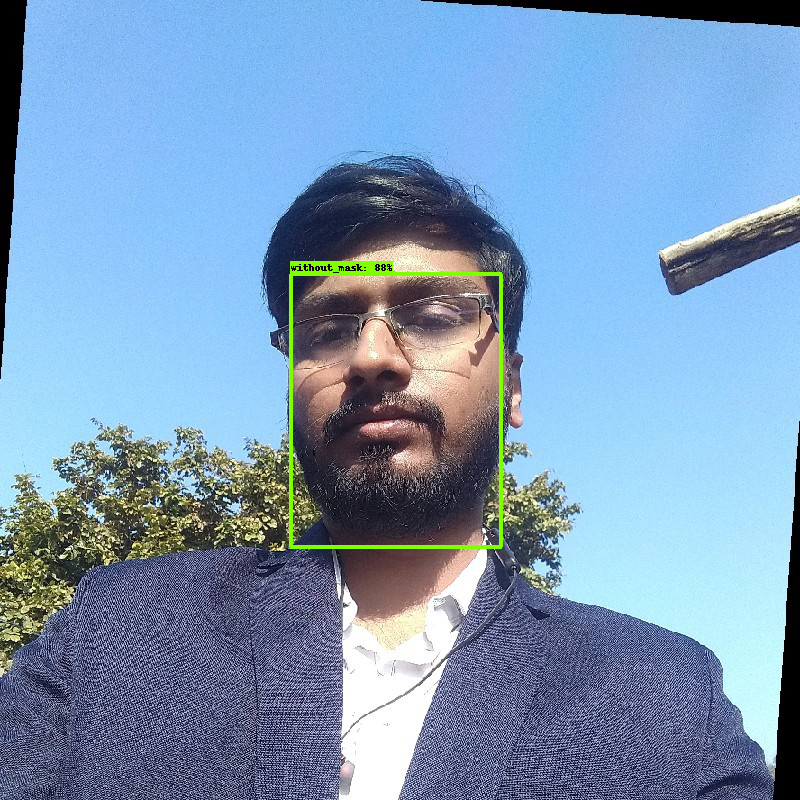

In [40]:
# Same test cell from above, only image extension is changed


import random
import cv2
from google.colab.patches import cv2_imshow

TEST_IMAGE_PATHS = glob.glob(DATASET_PATH + "custom_data/*.*")

images = TEST_IMAGE_PATHS
for image_path in images:
    print(image_path)
    try:
        image_np = load_image_into_numpy_array(image_path)
    except:
        print("Invalid Image format:", image_path)
        continue
        
    input_tensor = tf.convert_to_tensor(
            np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'][0].numpy(),
                (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
                detections['detection_scores'][0].numpy(),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.6,
                agnostic_mode=False,
    )

    cv2_imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))


# Removed output to hide my model

# Download the model

In [41]:
# Download your trained model for future use or integration in other projects

!zip -r /content/model.zip {MODEL_TEST}

from google.colab import files
files.download("/content/model.zip")

  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/ (stored 0%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/ (stored 0%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/variables/ (stored 0%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/variables/variables.index (deflated 78%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/assets/ (stored 0%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/saved_model/saved_model.pb (deflated 93%)
  adding: content/Tensorflow-Object-Detection/efficientdet_d0_coco17_tpu-32/export/checkpoint/ (stored 0%)
  adding: content/Tensorflow-Object-Detection

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Thank you for following us till the end. If you run into any issues, you can write a comment.

We love to hear feedback and your reviews encourage us to provide more quality content in the coming future. Check out the blog for an explanation of the process or to drop reviews, feedbacks or issues.